In [1]:

from urllib.request import urlopen
from IPython.display import SVG
import matplotlib.pyplot as plt
from rdkit import Chem
import pickle

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import visualizer as visualizer
import utils as utils
import fragmentation_py as fragmentation_py
import library_downloader as library_downloader
import SiteLocator as modSite

In [48]:
# library = "GNPS-LIBRARY"
library = "GNPS-MSMLS"
# library = "GNPS-NIH-NATURALPRODUCTSLIBRARY_ROUND2_POSITIVE"

# if directory does not exist, create it
if not os.path.exists( os.path.join("../data/libraries",library)):
    url = "https://gnps-external.ucsd.edu/gnpslibrary/" + library + ".json"
    location = "../data/libraries/" + library + "/"
    library_downloader.download(url, location, 0.5, 0.1)

# load data_dict_filtered
with open(os.path.join("../data/libraries",library,"data_dict_filtered.pkl"), "rb") as f:
    data_dict_filtered = pickle.load(f)

# load matches
with open(os.path.join("../data/libraries",library,"matches.pkl"), "rb") as f:
    matches = pickle.load(f)

# load cachedStructures_filtered
with open(os.path.join("../data/libraries",library,"cachedStructures.pkl"), "rb") as f:
    cachedStructures_filtered = pickle.load(f)


In [4]:
usi1 = "mzspec:GNPS:TASK-5700dee92610412ea452a4262add2b93-f.MSV000086107/ccms_peak/VVP3-2_EtAc_MeOh.mzML:scan:2303"
usi2 = "mzspec:GNPS:TASK-5700dee92610412ea452a4262add2b93-f.MSV000086107/ccms_peak/VVP77_MeOh.mzML:scan:3024"
smiles1 = "OC1=CC=CC=C1C2=NC(C3N(C)C(C(O)=O)CS3)CS2"
smiles2 = "OC1=CC=CC=C1C2=NC(C3N(C)C(C(OC)=O)CS3)CS2"

siteLocator = modSite.SiteLocator(usi1, usi2, smiles1, args={'mz_tolerance': 0.1})

{'adduct': 'M+H', 'filter_peaks_method': 'top_k', 'filter_peaks_variable': 50, 'mz_tolerance': 0.1, 'ppm': 1.01, 'min_score_ratio': 0.5, 'distance_decay': 0.1}


In [5]:
print (siteLocator.unshifted)
print (siteLocator.shifted)

[]
[(49, 28), (36, 21), (39, 22), (30, 17), (4, 2), (38, 19), (17, 8), (24, 11), (0, 4), (29, 16), (25, 12), (46, 24), (23, 13)]


In [22]:
from alignment import handle_alignment
res = handle_alignment(usi1, usi2, {'filter_peaks_method': 'top_k', 'filter_peaks_variable':50, 'mz_tolerance': 0.1})
print (len(res['matchedPeaks']), res['matchedPeaks'])

13 [(49, 28), (36, 21), (39, 22), (30, 17), (4, 2), (38, 19), (17, 8), (24, 11), (0, 4), (29, 16), (25, 12), (46, 24), (23, 13)]


In [21]:
from handle_network import getMatchedPeaks
res2 = getMatchedPeaks(usi1, usi2)
print (len(res2['peak_matches']), res2['peak_matches'])


14 [[64, 28], [48, 21], [51, 22], [42, 17], [5, 2], [50, 19], [23, 8], [34, 11], [1, 4], [41, 16], [35, 12], [60, 24], [33, 13], [0, 0]]


In [6]:
mol = Chem.MolFromSmiles(smiles2)
submol = Chem.MolFromSmiles(smiles1)

True


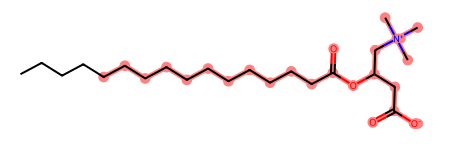

In [7]:
print(mol.HasSubstructMatch(submol))
mol.GetSubstructMatches(submol)
mol

In [8]:
Chem.MolToSmiles(siteLocator.molMol)

'CCCCCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C'

In [9]:
mol = Chem.MolFromSmiles(smiles1, sanitize=False)
Chem.MolToSmiles(mol)

'CCCCCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C'

344.2798156738281
['CCCCCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C']
285.2060852050781
['CCCCCCCCCCCC(=O)OCC[N+](C)(C)C', 'CCCCCCCCCCCC(=O)O[C@@H](C)CC(=O)[O-]', 'CCCCCCCCCCC(=O)O[C@H](C)C[N+](C)(C)C', 'CCCCCCCCCCCCO[C@H](C)C[N+](C)(C)C', 'CCCCCCCCCCCC(=O)O[C@H](C)C[N+](C)C', 'CCCCCCCCCCCC(=O)O[C@H](C)C[N+](C)C', 'CCCCCCCCCCCC(=O)O[C@H](C)C[N+](C)C', 'CCCCCCCCCO[C@H](CC(=O)[O-])C[N+](C)(C)C', 'CCCCCCCCC(=O)O[C@H](CC=O)C[N+](C)(C)C', 'CCCCCCCCC(=O)O[C@H](CC[O-])C[N+](C)(C)C', 'CCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)C', 'CCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)C', 'CCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)C']
only 4 structures shown
183.1742706298828
['CCCCCCCCCCCC=O', 'CCCCCCCCCCCCO', 'CCCCCCCCCCC(=O)O']
201.1846160888672
['CCCCCCCCCCCC(=O)O', 'CCCCC(=O)O[C@H](C)C[N+](C)(C)C', 'CCCO[C@H](CC(=O)[O-])C[N+](C)(C)C', 'CCC(=O)O[C@H](CC=O)C[N+](C)(C)C', 'CCC(=O)O[C@H](CC[O-])C[N+](C)(C)C', 'CCC(=O)O[C@H](CC(=O)[O-])C[N+](C)C', 'CCC(=O)O[C@H](CC(=O)[O-])C[N+](C)C', 'CCC(=O)O[C@H](CC(=O)[O-])C[N+]

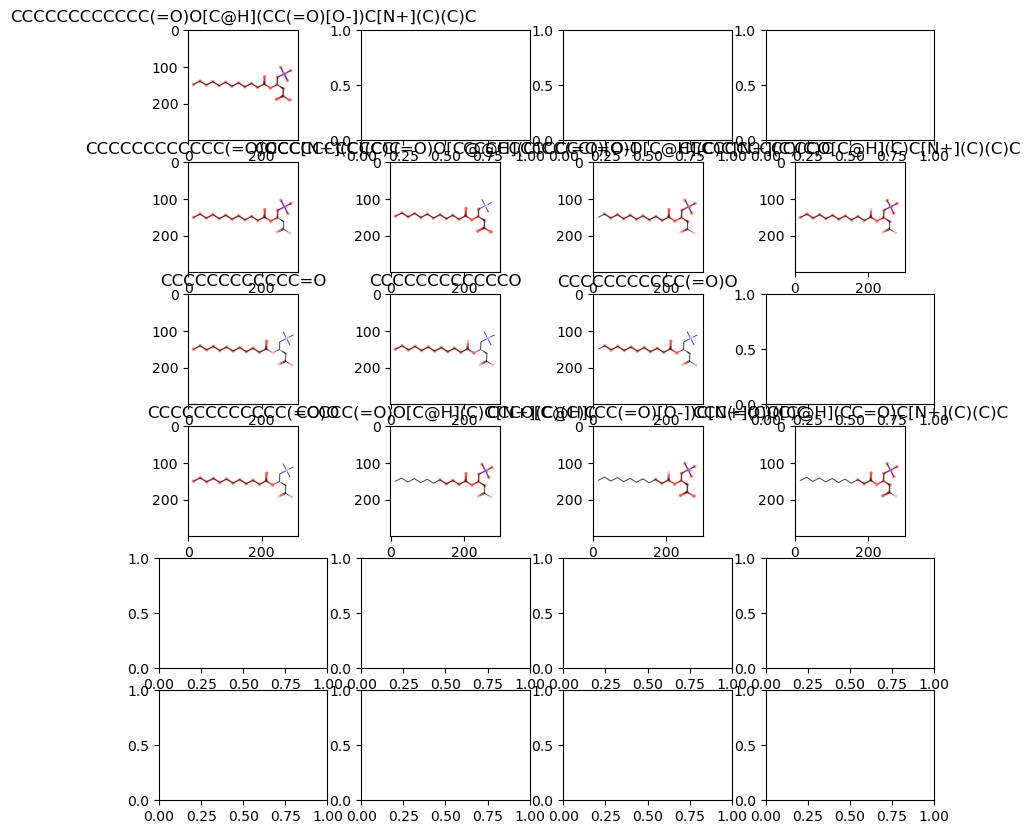

In [10]:

fig, axes = plt.subplots(len(siteLocator.shifted), 4, figsize=(10, 10))

for i, pair in enumerate(siteLocator.shifted):
    structures = siteLocator.get_structures_per_peak(siteLocator.molPeaks[pair[0]][0], 0.1)
    print(siteLocator.molPeaks[pair[0]][0])
    print(structures)
    res = []
    for j, structure in enumerate(structures):
        if j == 4:
            print("only 4 structures shown")
            break
        mol = Chem.MolFromSmiles(smiles1)
        substruct = Chem.MolFromSmiles(structure, sanitize=False)
        hitAtoms, hitBonds = utils.getHitAtomsAndBonds(mol, substruct)
        axes[i, j].imshow(Chem.Draw.MolToImage(mol, highlightAtoms=hitAtoms[0], highlightBonds=hitBonds[0], highlightAtomColors=[(0, 0, 1)]))
        axes[i, j].set_title(structure)

In [14]:
mol = Chem.MolFromSmiles(smiles2)
submol = Chem.MolFromSmiles(smiles1)
modifSite = utils.calculateModificationSites(mol, submol, inParent=False)
print(modifSite)
siteLocator.accuracy_score(modifSite[0], return_all=True)

[0]


{'score': 0.4411392795460152,
 'count': 21,
 'isMax': 0,
 'closestMaxAtomDistance': 0.0}

In [15]:
scores_unshifted, scores_shifted = siteLocator.calculate_score()
scores = siteLocator.distance_score( scores_unshifted, scores_shifted)

In [17]:
print(max(scores), scores)

1.0 [0.60810811 0.42972973 0.23243243 0.17567568 0.06486486 0.
 0.01891892 0.08918919 0.18378378 0.48378378 0.65945946 0.84864865
 1.         0.99189189 0.86756757 0.85405405 0.71081081 0.79459459
 0.77837838 0.77837838 0.84324324 0.78918919 0.78918919 0.78918919]


In [12]:
frag = siteLocator.fragments.find_fragments(58.0356, 1, 1, 0.1)[0]
print(frag)
siteLocator.fragments.get_fragment_info(frag[0], 1)

[15, 2.0, 1, 57.0704252889, 1]


(',0,1,2,3', [0, 1, 2, 3], 'H9C4', 'CCCC')

In [13]:
from rdkit.Chem import rdMolDescriptors
rdMolDescriptors.CalcMolFormula(submol1)

NameError: name 'submol1' is not defined

In [ ]:
siteLocator.fragments.fragment_info

[[0, 0, 0],
 [2097151, 0, 0],
 [2097150, 1.0, 1],
 [1, 1.0, 1],
 [2097148, 12.0, 2],
 [2097147, 12.0, 2],
 [2097143, 12.0, 2],
 [2097135, 12.0, 2],
 [2097119, 12.0, 2],
 [2097024, 2.0, 1],
 [63, 12.0, 2],
 [2096896, 3.0, 2],
 [127, 2.0, 1],
 [2096895, 3.0, 2],
 [523264, 2.0, 1],
 [1573375, 3.0, 2],
 [522240, 2.0, 2],
 [1573887, 2.0, 1],
 [4096, 1.0, 1],
 [2091007, 2.0, 2],
 [2093055, 1.0, 1],
 [114688, 2.0, 1],
 [1974271, 3.0, 2],
 [65536, 2.0, 1],
 [32768, 1.0, 1],
 [1982463, 2.0, 1],
 [2064383, 1.0, 1],
 [2031615, 2.0, 1],
 [1966079, 3.0, 2],
 [1835007, 2.0, 2],
 [1572863, 3.0, 2],
 [1048575, 2.0, 2],
 [1573760, 4.0, 2],
 [2092928, 3.0, 2],
 [1982336, 4.0, 2],
 [2064256, 3.0, 2],
 [2031488, 4.0, 2],
 [2096640, 2.0, 2],
 [256, 3.0, 2],
 [1572864, 3.0, 2],
 [524032, 4.0, 2],
 [1048576, 2.0, 2],
 [1048320, 3.0, 2],
 [519168, 3.0, 2],
 [408576, 4.0, 2],
 [490496, 3.0, 2],
 [457728, 4.0, 2],
 [516096, 2.0, 2],
 [393216, 3.0, 2],
 [6144, 2.0, 2],
 [262144, 2.0, 2],
 [129024, 3.0, 2],
 [260

In [ ]:
siteLocator.fragments.get_fragment_info(2031615, 1)

(',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20',
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20],
 'H16C14N2O2S2',
 'CN1C(CO)CSC1C1CSC(c2ccccc2O)=N1')

In [ ]:
# t = Chem.MolFromSmiles('CN1C(CO)CSC1C1CSC(c2ccccc2O)=N1')
# # include hydrogen
# t = Chem.AddHs(t)
t

NameError: name 't' is not defined

In [ ]:
rdMolDescriptors.CalcMolFormula(Chem.MolFromSmiles('CC(=O)O'))

'C2H4O2'

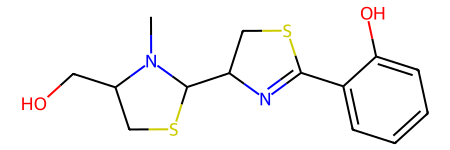

In [ ]:
Chem.MolFromSmiles('CN1C(CO)CSC1C1CSC(c2ccccc2O)=N1', sanitize=False)

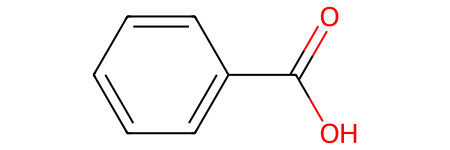

In [18]:
import requests
import json
def getDataFromUsi(usi):
    url = 'https://metabolomics-usi.ucsd.edu/json/' + "?usi1=" + usi
    r = requests.get(url)
    return json.loads(r.text)

In [20]:
usi = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005464549"
data = getDataFromUsi(usi)
data

{'n_peaks': 446,
 'peaks': [[49.50275802612305, 0.0],
  [49.502925872802734, 0.0],
  [49.503089904785156, 0.0],
  [50.770748138427734, 0.0],
  [50.77091979980469, 0.0],
  [50.77109146118164, 0.0],
  [50.77177810668945, 11643.0244140625],
  [50.77245330810547, 0.0],
  [50.77262496948242, 0.0],
  [50.772796630859375, 0.0],
  [52.61549758911133, 0.0],
  [52.61567687988281, 0.0],
  [52.61585998535156, 0.0],
  [52.616580963134766, 11391.90234375],
  [52.61729049682617, 0.0],
  [52.61747360229492, 0.0],
  [52.617652893066406, 0.0],
  [55.05373001098633, 0.0],
  [55.053924560546875, 0.0],
  [55.054115295410156, 0.0],
  [55.055084228515625, 24314.103515625],
  [55.05604934692383, 0.0],
  [55.056243896484375, 0.0],
  [55.05643844604492, 0.0],
  [57.032535552978516, 0.0],
  [57.03274154663086, 0.0],
  [57.03294372558594, 0.0],
  [57.03437423706055, 255648.3125],
  [57.035797119140625, 0.0],
  [57.03600311279297, 0.0],
  [57.03620529174805, 0.0],
  [57.068904876708984, 0.0],
  [57.06911087036133,

In [43]:

def usi_to_SpectrumTuple(usi):
    """
    Converts the usi to SpectrumTuple.
    """
    data = getDataFromUsi(usi)
    return utils.convert_to_SpectrumTuple(data['peaks'], data['precursor_mz'], data['precursor_charge'])

data = usi_to_SpectrumTuple(usi)
print (type(data))

<class 'alignment.SpectrumTuple'>


In [44]:
from alignment import SpectrumTuple

if type(data) == SpectrumTuple:
    print("yes")

yes


In [33]:
# json string to list
import json
peaks = json.loads(data_dict_filtered['CCMSLIB00005464549']['peaks_json'])
peaks


[[49.502758, 0.0],
 [49.502926, 0.0],
 [49.50309, 0.0],
 [50.770748, 0.0],
 [50.77092, 0.0],
 [50.771091, 0.0],
 [50.771778, 11643.024414],
 [50.772453, 0.0],
 [50.772625, 0.0],
 [50.772797, 0.0],
 [52.615498, 0.0],
 [52.615677, 0.0],
 [52.61586, 0.0],
 [52.616581, 11391.902344],
 [52.61729, 0.0],
 [52.617474, 0.0],
 [52.617653, 0.0],
 [55.05373, 0.0],
 [55.053925, 0.0],
 [55.054115, 0.0],
 [55.055084, 24314.103516],
 [55.056049, 0.0],
 [55.056244, 0.0],
 [55.056438, 0.0],
 [57.032536, 0.0],
 [57.032742, 0.0],
 [57.032944, 0.0],
 [57.034374, 255648.3125],
 [57.035797, 0.0],
 [57.036003, 0.0],
 [57.036205, 0.0],
 [57.068905, 0.0],
 [57.069111, 0.0],
 [57.069313, 0.0],
 [57.070747, 403567.875],
 [57.072174, 0.0],
 [57.07238, 0.0],
 [57.072586, 0.0],
 [57.464951, 0.0],
 [57.46516, 0.0],
 [57.465366, 0.0],
 [57.46619, 12788.617188],
 [57.467014, 0.0],
 [57.46722, 0.0],
 [57.467426, 0.0],
 [58.064594, 0.0],
 [58.064804, 0.0],
 [58.065014, 0.0],
 [58.066063, 54237.703125],
 [58.067318, 0.0],

Is the filter working?

In [5]:
helper_usi = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463927"
base_usi = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005463968"
modified_usi = "mzspec:GNPS:GNPS-MSMLS:accession:CCMSLIB00005464188"
helper_smiles = "NCCCCC(O)=O"
base_smiles = "NCCC[C@H](N)C(O)=O"
modified_smiles = "N[C@@H](CCCNC(N)=O)C(O)=O"

In [6]:
siteLocator = modSite.SiteLocator(base_usi, modified_usi, base_smiles)

{'adduct': 'M+H', 'filter_peaks_method': 'top_k', 'filter_peaks_variable': 50, 'mz_tolerance': 0.05, 'ppm': 1.01, 'min_score_ratio': 0.5, 'distance_decay': 0.1}


In [7]:
siteLocator.helper_molecule(helper_usi, helper_smiles)

AttributeError: 'SiteLocator' object has no attribute 'molData'